<a href="https://colab.research.google.com/github/BasmaAfreen/Stats-DeepLearning_Projects/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine you have a collection of different types of juices, and you're trying to figure out what makes each juice special. Here's what each column in the table represents:

Type: The kind of juice (in this case, it's all Type 1).

Alcohol: The amount of alcohol in the juice.

Malic: The amount of malic acid, which makes the juice taste a bit sour.

Ash: The amount of ash left after burning the juice, which tells us about the minerals in it.

Alcalinity: How basic or alkaline the juice is.

Magnesium: The amount of magnesium in the juice.

Phenols: The amount of phenolic compounds, which can affect the taste and health benefits.

Flavanoids: The amount of flavanoids, which are also good for health and taste.

Nonflavanoids: The amount of other compounds that aren't flavanoids.

Proanthocyanins: Another type of compound that's good for health.

Color: The color intensity of the juice.

Hue: The shade or tint of the color.

Dilution: How much the juice can be diluted before it loses its taste.

Proline: An amino acid that's present in the juice

# Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.info()
# Proline Magnesium   are    int64   datatype all other are float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# EDA

In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# histogram

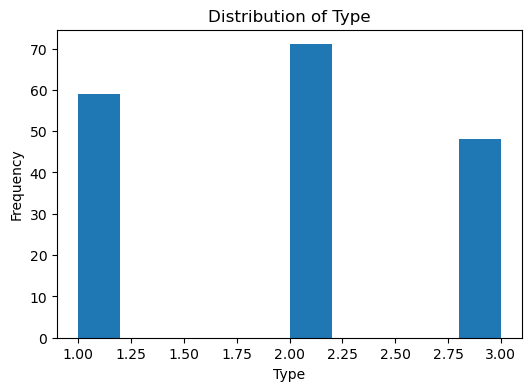

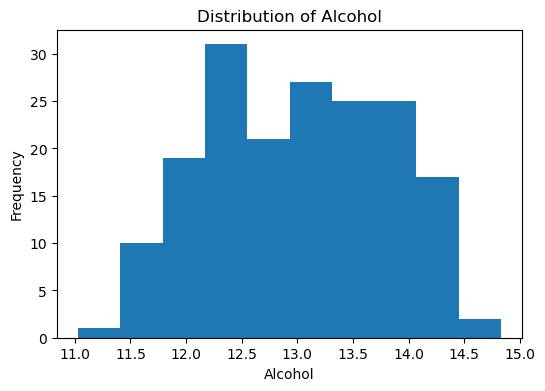

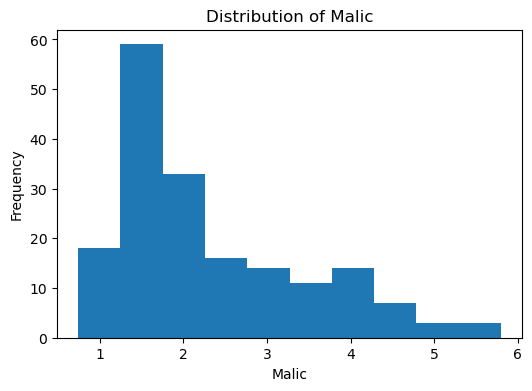

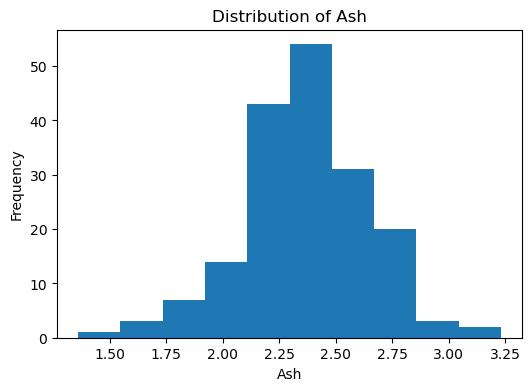

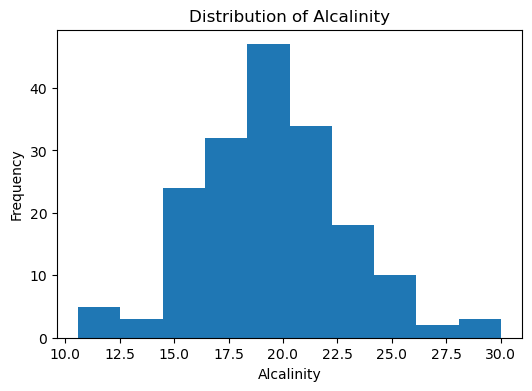

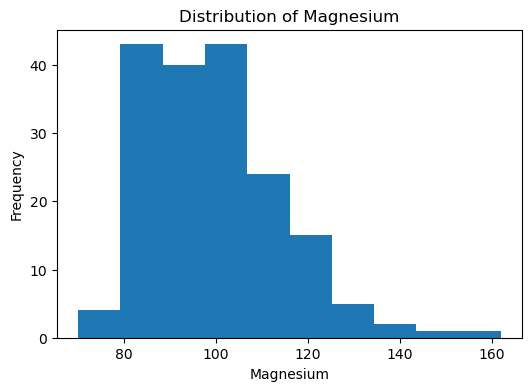

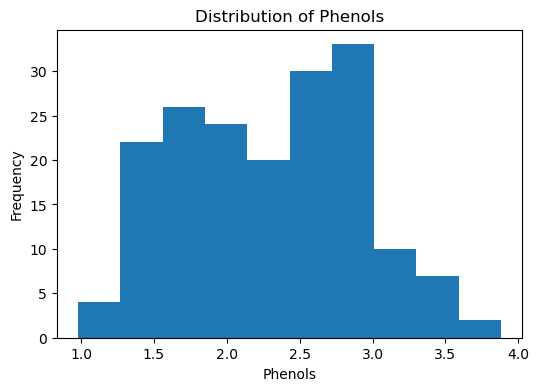

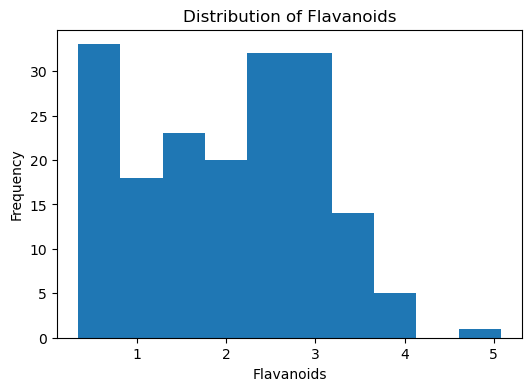

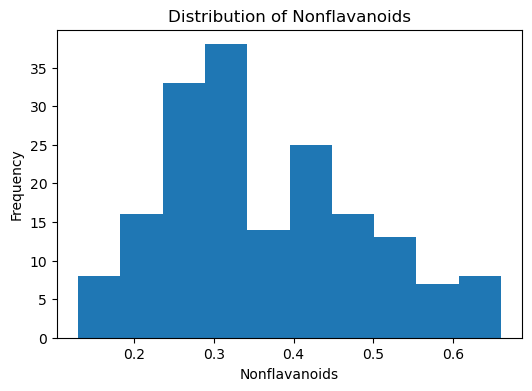

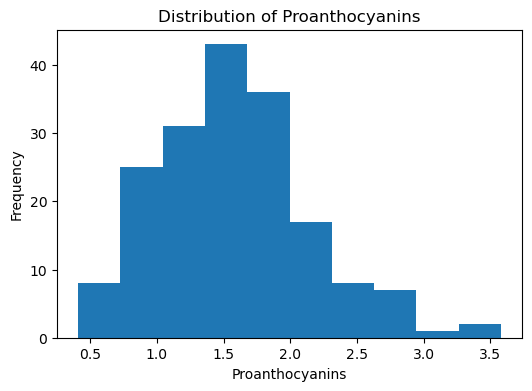

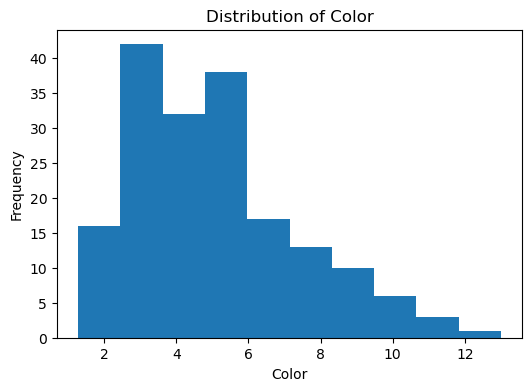

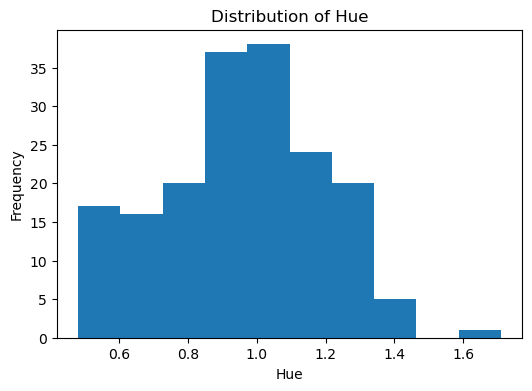

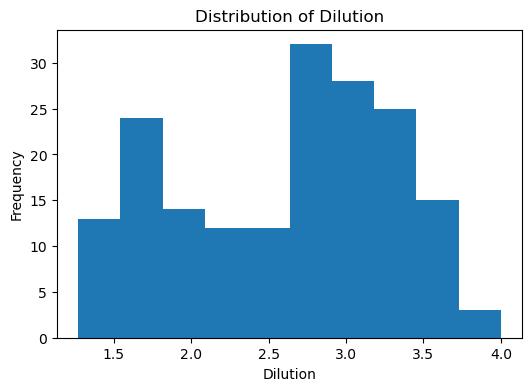

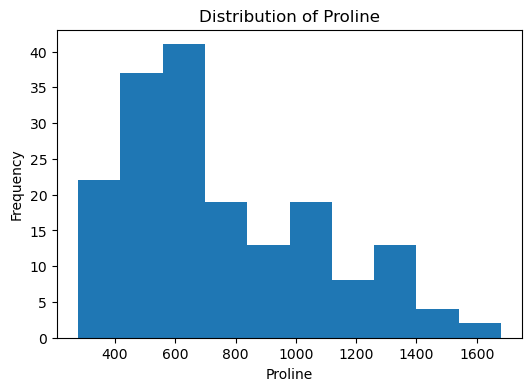

In [ ]:
# in above dataset all col datatype is int. But few are Continous and discrete(countable).
# Selecting continous columns and placing in list.
num_columns=df.select_dtypes(include=("number")).columns


# Plot hist for each continous column using matplotlib to analyse data distribution
# Loop through each continous  column and plot histogram
for col in num_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
df.skew()



Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

- Positive Skewness: Values like Malic (1.039651), Magnesium (1.098191), Color (0.868585), Proanthocyanins (0.517137), Nonflavanoids (0.450151),
   and Proline (0.767822) have positive skewness, meaning the data is skewed to the right. This indicates that there are more values on the lower
   side and a few extremely high values.
-  Negative Skewness: Values like Alcohol (-0.051482), Ash (-0.176699), and Dilution (-0.307285) have negative skewness, meaning the data is
   skewed to the left. This indicates that there are more values on the higher side and a few extremely low values.

-  **Near-Zero Skewness: Values like Type (0.107431), Phenols (0.086639), Flavanoids (0.025344), and Hue (0.021091),Alcalinity  ( 0.213047)  
      Alcohol (-0.051482), Ash (-0.176699), and Dilution (-0.307285) have near-zero skewness, meaning the data distribution is fairly symmetrical.**

# bargraph

C:\Users\Basma\AppData\Local\Temp\ipykernel_12676\4077737496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='pastel')


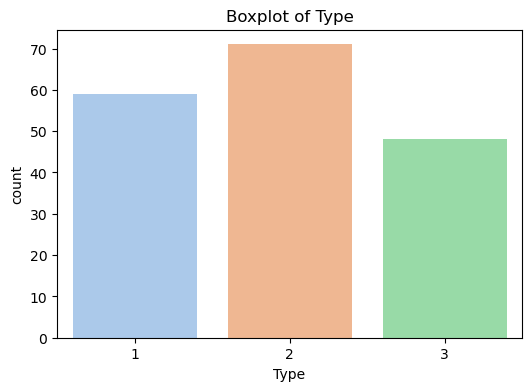

In [ ]:
#this are discrete datatype but stored as integers.

# Selecting discrete columns and placing in list.
category_col=['Type']

#category_col=df.select_dtypes(include=['object']).columns  selects only one bcz only one var is of object type

# Plot countplot(bar graph) for each discrete column using matplotlib to  compare categories.
# Loop through each continous  column and plot countplot
for col in category_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col],palette='pastel')
    plt.title(f"Boxplot of {col}")
    plt.show()

# the count type 2 juice is  highest

# boxplot

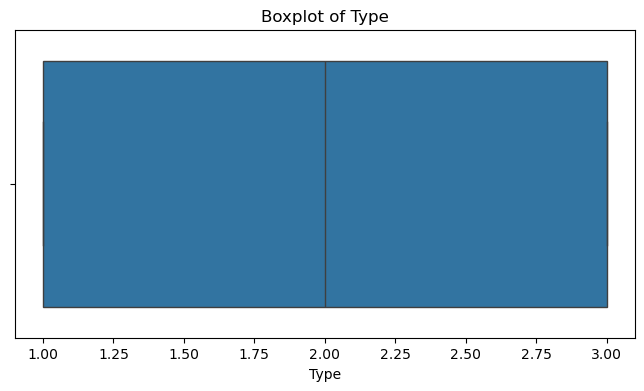

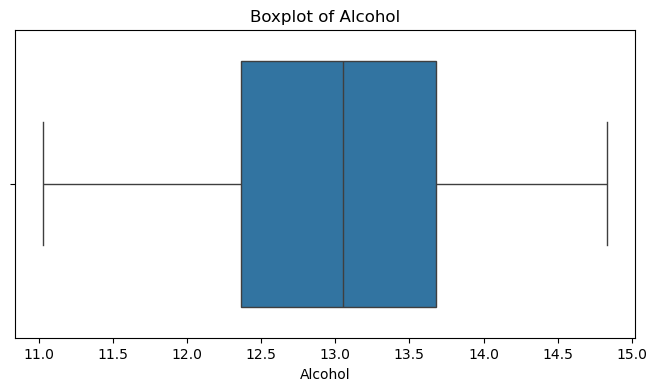

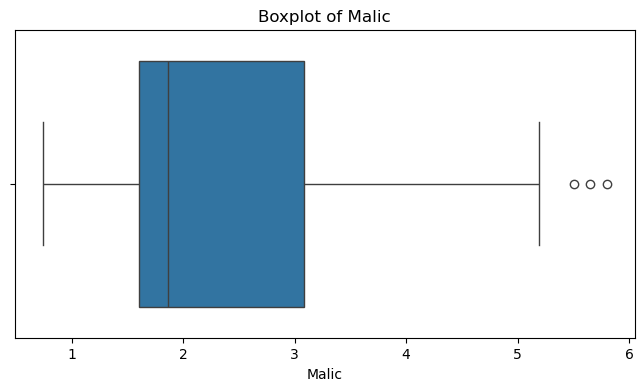

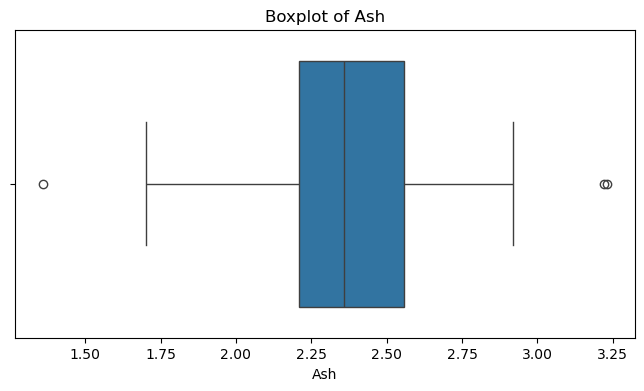

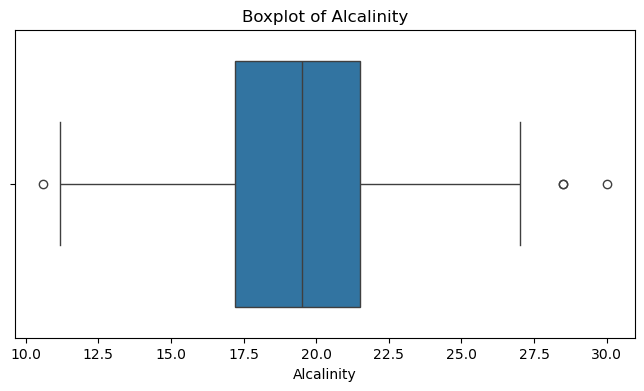

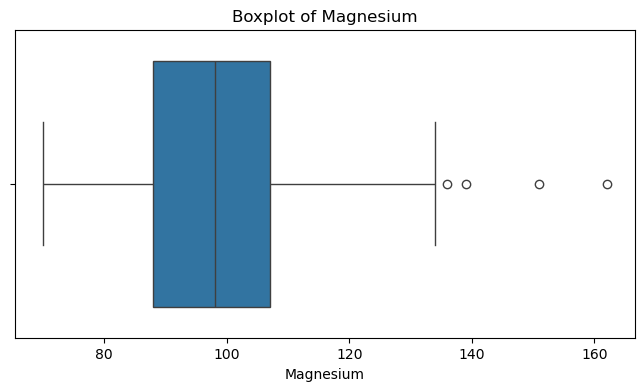

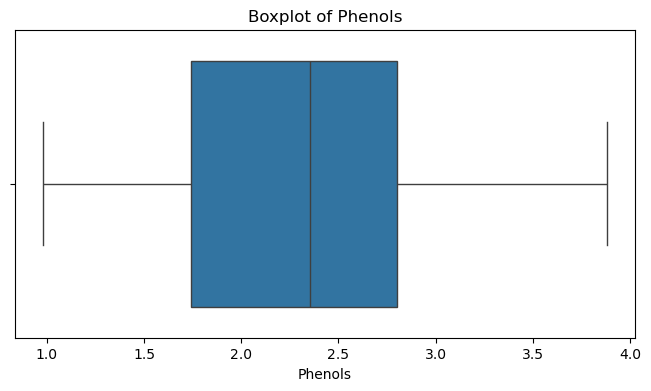

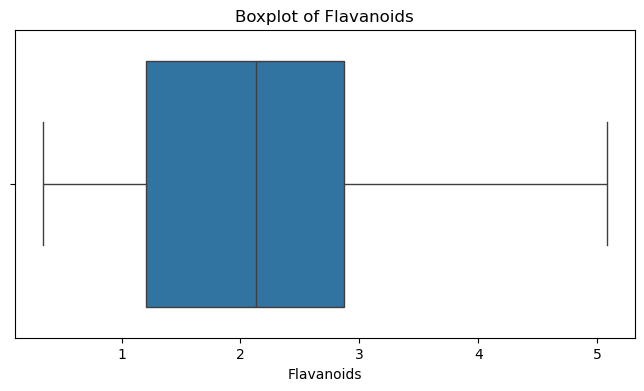

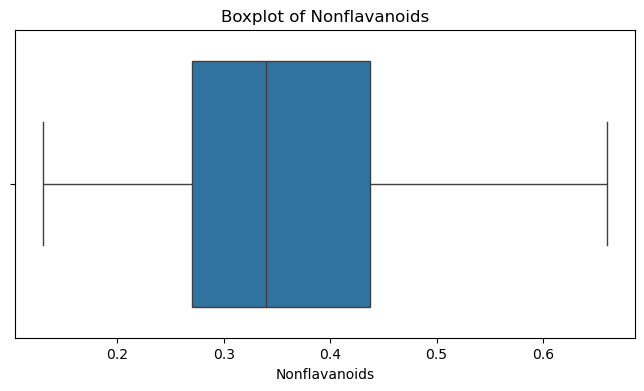

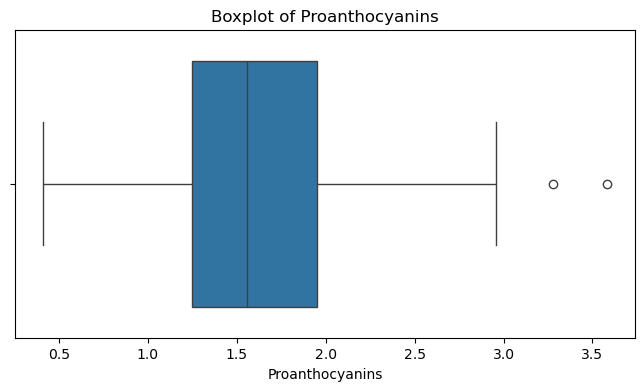

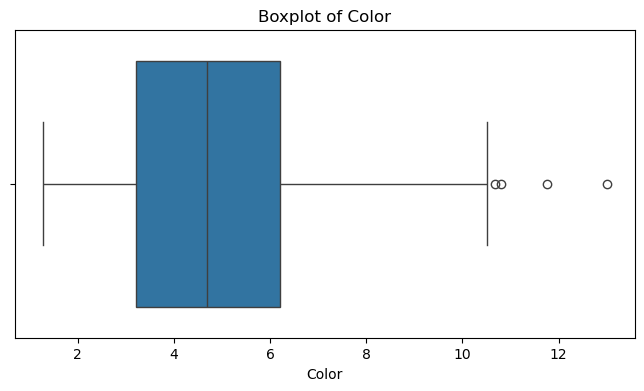

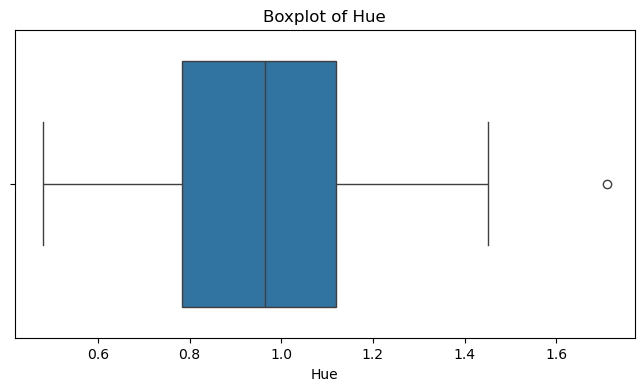

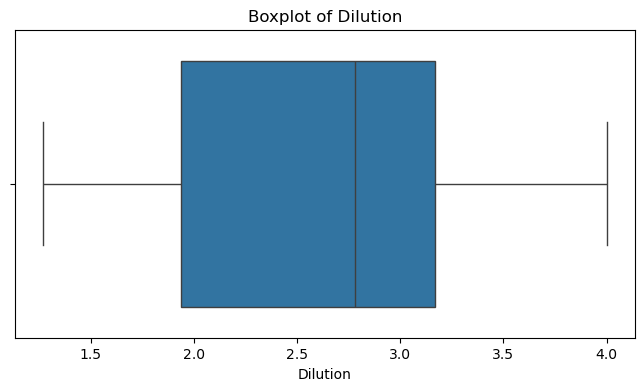

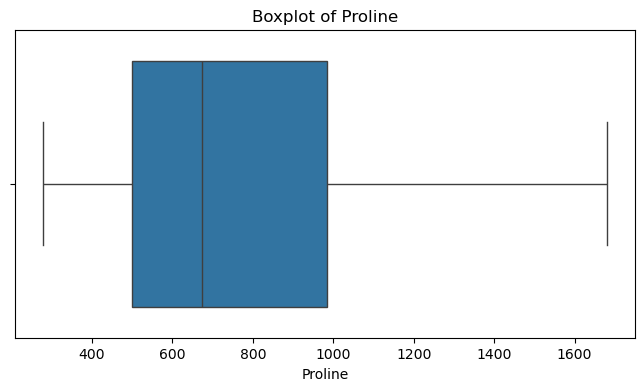

In [ ]:
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()


**the ouliers in color,magnesium, alcalinity,ash,malic  are very less ,hence no need to remove them**

# correlation matrix

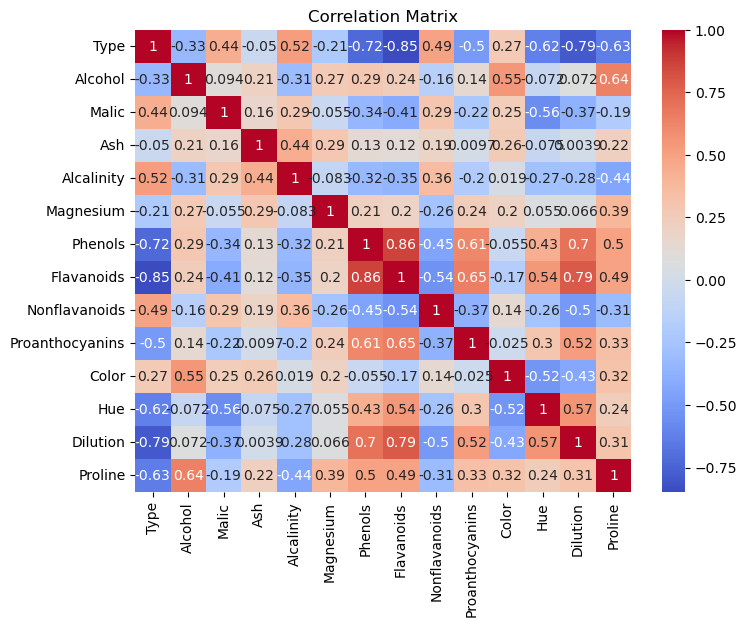

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

-  type=proline(0.63),dilution(.79),hue(.62),Flavanoids(85),Phenols(72),Alcalinity(52),Proanthocyanins(5)
- Alcohol=Proline(64),colr(55)
- malic=hue(56)
- Phenols=Proline(50),,dilution(.70),Proanthocyanins(61),Flavanoids(86)
- Flavanoids=dilution,hue,Proanthocyanins,Phenols
- Proanthocyanins=dilution
- color=hue(-)
- hue =dilution

**There is strong positive and negative  correraltion between features .hence multicolinearity issue  exits between variable** .

# Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.


In [ ]:
X=df.iloc[:,1:]
X


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
Y=df[["Type"]]
Y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [ ]:
from sklearn.preprocessing import StandardScaler
x_ss=StandardScaler()
ss=x_ss.fit_transform(X)
stand_df=pd.DataFrame(ss)
stand_df.columns = list(df.iloc[:,1:])
#stand_df
stand_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
ALL_COL=pd.concat([Y,stand_df],axis=1)
ALL_COL


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,3,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,3,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,3,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# PCA

#### stand_df

In [ ]:
#  only standardized_df  (13col)
from sklearn.decomposition import PCA
pca = PCA()
PC1 = pca.fit_transform(stand_df)
PC1 = pd.DataFrame(PC1)
PC1


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


#### ALL_COL

In [ ]:
#ALL_COL(0 :14)  14col

from sklearn.decomposition import PCA
pca2 = PCA()
PC2= pca2.fit_transform(ALL_COL)
PC2 = pd.DataFrame(PC2)
PC2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.441657,-1.449756,-0.165164,-0.112416,0.723665,-0.274200,0.581961,0.059907,-0.542568,1.049656,-0.431339,0.546700,-0.200535,0.185514
1,2.404678,0.331191,-2.026609,-0.358430,-0.289806,-0.907656,-0.002210,1.017612,0.267013,0.057279,-0.134423,0.391515,-0.079827,0.106390
2,2.679474,-1.034930,0.983074,0.699028,-0.318210,0.497158,0.467932,-0.302119,1.210890,0.002283,-0.281748,0.001219,0.028637,-0.063165
3,3.856861,-2.764106,-0.175447,0.568690,-0.306786,0.210101,-0.394057,0.630316,-0.083173,0.157031,0.769002,-0.236666,-0.454778,0.064630
4,1.251577,-0.868489,2.026165,-0.426423,0.243910,-0.529828,0.447468,0.427208,-0.294538,0.036252,-0.533837,-0.221524,0.132570,-0.477018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.526617,-2.209979,-0.343238,0.910714,-0.826264,-1.142390,0.882190,-0.180047,-0.057303,-0.363712,0.137653,0.172741,-0.170752,0.105032
174,-2.809802,-1.753991,0.207519,0.379049,0.205937,-0.047511,0.142321,-0.560289,0.073724,-0.227457,0.255677,-0.278520,-0.194551,0.009065
175,-2.891731,-2.757732,-0.940857,0.470651,1.209982,0.108385,0.716329,0.050091,-0.017254,-0.230371,0.506123,0.696175,0.123156,-0.030454
176,-2.612102,-2.295025,-0.550561,-0.540463,0.968929,1.079046,0.716442,0.411132,0.001773,0.488578,0.308972,0.341918,-0.073602,0.100423


C:\Users\Basma\AppData\Local\Temp\ipykernel_12676\4180367207.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(PC2.iloc[:,0], PC2.iloc[:,1], cmap='rainbow')


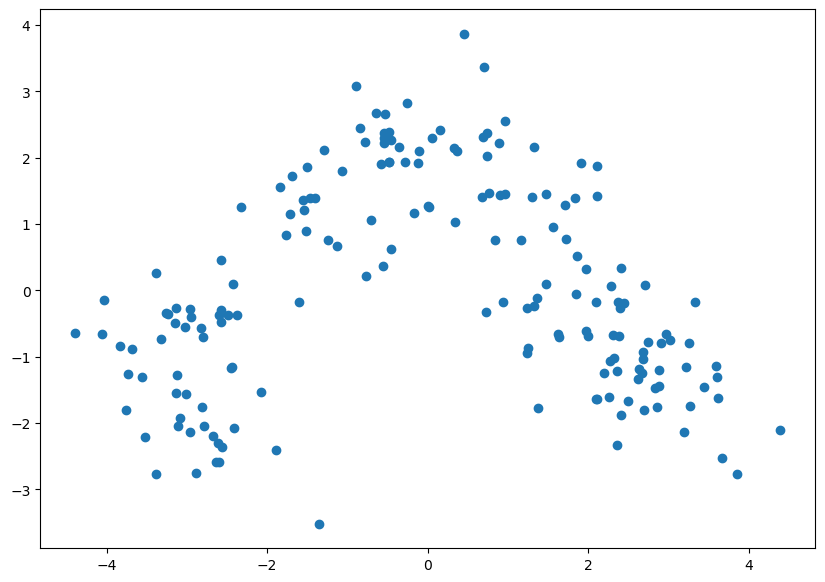

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(PC1.iloc[:,0], PC1.iloc[:,1], cmap='rainbow')
plt.show()
# this pattern belongs to entire original dataset  means we are putting all the info into 2dim and using for visualization.

C:\Users\Basma\AppData\Local\Temp\ipykernel_12676\2678282428.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(PC2.iloc[:,12], PC2.iloc[:,13], cmap='rainbow')


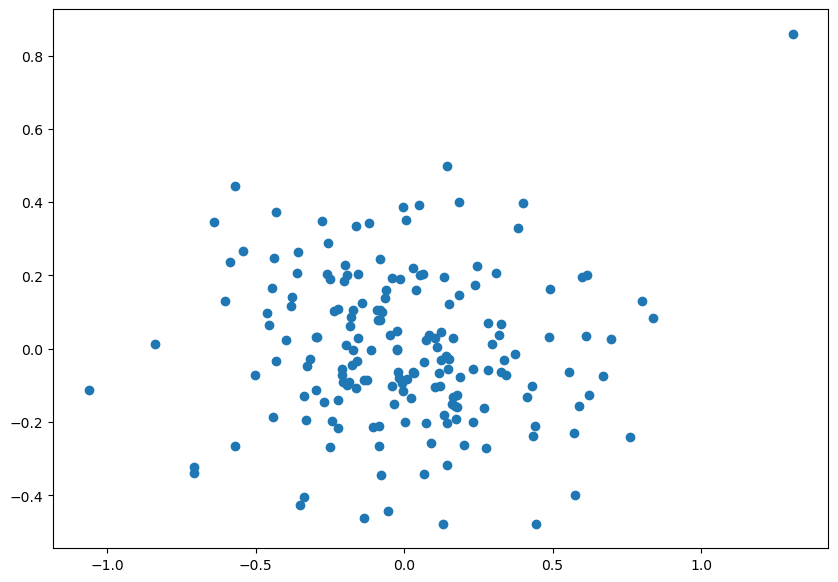

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(PC1.iloc[:,12], PC1.iloc[:,13], cmap='rainbow')
plt.show()

## We can measure the amount of information each of these principal component columns contains by calculating the variance for each PC."

In [ ]:
var=PC1.var() #only   standardardized df
#These values represent the actual variances of the principal components after performing PCA. They show how much variance each principal component captures from the data
#For example, the first principal component (PC1) captures a variance of 4.732437, which means it explains a significant portion of the total variance in the dataset.
# the variance decresed form top to bottom.the  first col  are very important.
var

0     4.732437
1     2.511081
2     1.454242
3     0.924166
4     0.858049
5     0.645282
6     0.554141
7     0.350466
8     0.290512
9     0.252320
10    0.227064
11    0.169724
12    0.103962
dtype: float64

In [ ]:
var2=PC2.var()
var2

0     5.223939
1     2.511148
2     1.454243
3     0.928476
4     0.873014
5     0.664913
6     0.556028
7     0.351328
8     0.293426
9     0.259320
10    0.227104
11    0.169737
12    0.117854
13    0.043596
dtype: float64

# create a scree plot using the `matplotlib` library. Scree plots are typically used in Principal Component Analysis (PCA) to show the variance explained by each principal component:

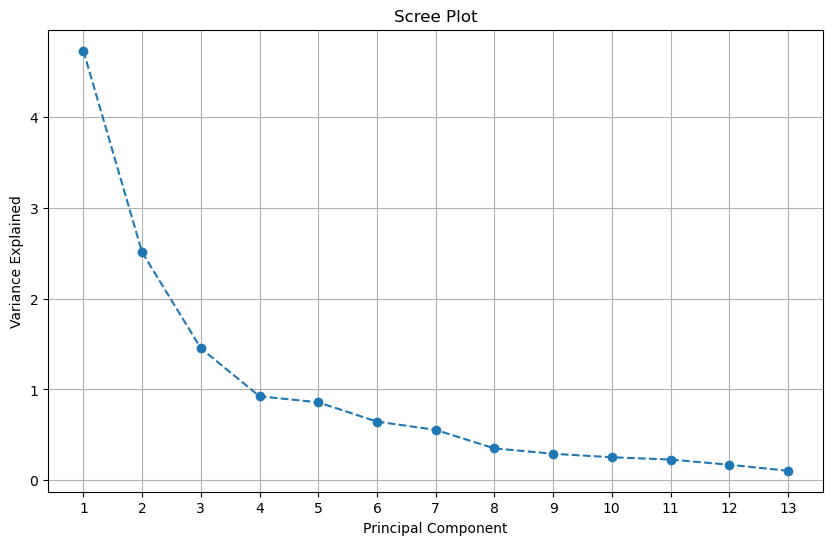

In [ ]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(var) + 1))
plt.grid()
plt.show()
#Finally, we plot the actual variances (of the principal components after performing PCA) of each principal component to create the scree plot.
# ex :- the 1st single column  variance is 4.0 high variance means it has a lot of info


In [ ]:
# Perform PCA
pca = PCA()
pca.fit(ALL_COL)

# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance  #These values are the *proportion  % of the dataset's total variance* explained by each principal component.
#For example, the first principal component (PC1) explains 36.198848% of the total variance in the dataset.

array([0.38203095, 0.18364233, 0.10635   , 0.06790018, 0.06384425,
       0.04862565, 0.04066279, 0.02569289, 0.02145848, 0.01896427,
       0.01660827, 0.01241298, 0.00861877, 0.00318821])

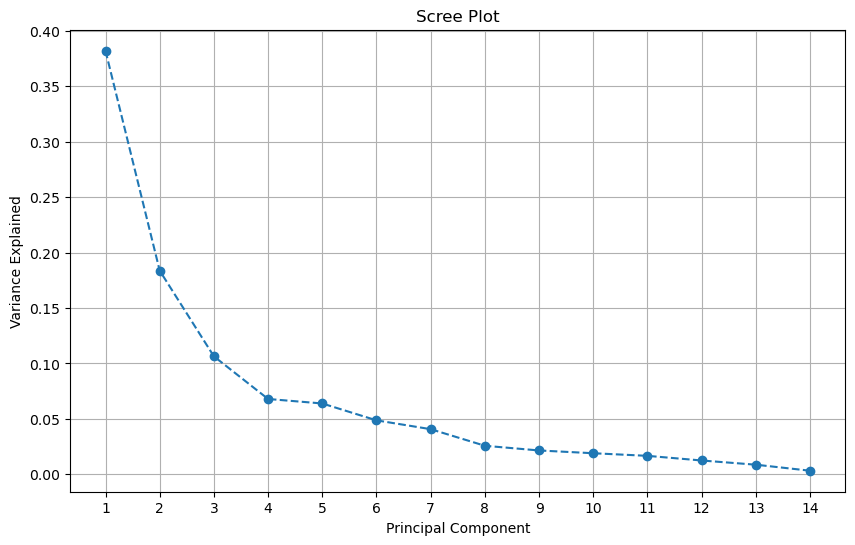

In [ ]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()



#Finally, we plot the explained variance of each principal component to create the scree plot.
# ex :- the 1st single column  alone giving   us 36% of info of original dataset .
# ex :- the 2st single column  alone giving   us 19% of info of original dataset   and soo.


-  The x-axis lists the components, and the y-axis reflects the variance. The first few components explain most of the variance, while the rest contribute less.
AS we can observe the variance is  is slightly decresed from PC 1 TO PC8  
-Observation: The variance significantly decreases from PC 1 to PC 7,or pc6 indicating these components still hold substantial information about the dataset.
             However, from PC 8 to PC 13, the variance decreases very  slightly, suggesting these components add minimal additional value.
             .hence we can drop this PC 9 to PC 13 Columns.or hence we can drop this PC 7 to PC 13 Column

In [ ]:
PC3=PC1.iloc[:,: 7]  #6pc
PC3

,0,1,2,3,4,5,6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


# Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


### stabdardized

In [ ]:
stand_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:

k_scores = []

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i,n_init=20)
    stand_df["kmeans"] = cluster.fit_predict(stand_df)  #stabdardized and diserte data
    from sklearn.metrics import silhouette_score
    k_scores.append(silhouette_score(stand_df,stand_df["kmeans"]) )



print(stand_df["kmeans"].value_counts())
k_scores  #calculating silhouette_score   for diff k values .

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

kmeans
1    31
0    29
7    24
6    22
5    22
2    15
9    14
4    11
3     7
8     3
Name: count, dtype: int64


[0.2719032411775492,
 0.32041621459358616,
 0.3041420801926072,
 0.3111974333749089,
 0.31790536787739837,
 0.28930446998553494,
 0.3123094007115224,
 0.33175651675178064,
 0.3711197347991908]

### stabdardized and diserte data

In [ ]:
ALL_COL.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
k_scores = []

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i,n_init=20)
    ALL_COL["kmeans"] = cluster.fit_predict(ALL_COL)  #stabdardized and diserte data
    from sklearn.metrics import silhouette_score
    k_scores.append(silhouette_score(ALL_COL,ALL_COL["kmeans"]) )



print(ALL_COL["kmeans"].value_counts())
k_scores  #calculating silhouette_score   for diff k values .

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

kmeans
3    33
2    30
1    27
6    24
5    19
7    13
9    12
4     9
0     8
8     3
Name: count, dtype: int64


[0.2907619989798708,
 0.3265012103321196,
 0.3108650286827372,
 0.36017031917914705,
 0.24189138573747862,
 0.32520780586307985,
 0.3131100931381558,
 0.3103745761017226,
 0.30584400007538837]

### #original dataframe  :droping type var  as we know  clustering is not suitable for DIsCReTE  datatype.  

In [ ]:
df1=df.iloc[:,1:14]
df1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
k_scores = []

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i,n_init=20)
    df1["kmeans"] = cluster.fit_predict(df1)     #original dataframe
    from sklearn.metrics import silhouette_score
    k_scores.append(silhouette_score(df1,df1["kmeans"]) )



print(df1["kmeans"].value_counts())
k_scores  #calculating silhouette_score   for diff k values .

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

kmeans
0    31
8    29
2    23
3    17
5    17
9    16
6    15
1    14
7    10
4     6
Name: count, dtype: int64


[0.6568547938114834,
 0.5711566129967663,
 0.5611605682078395,
 0.549098695614777,
 0.5656925041246952,
 0.5618228752123378,
 0.5376132435954585,
 0.5320722094791557,
 0.5222242959601557]

In [ ]:
B=df.iloc[:,0:14]

from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2)
cluster.fit(B)
B["kmeans"] = cluster.fit_predict(B)
print(B["kmeans"].value_counts())

from sklearn.metrics import silhouette_score
m1= silhouette_score(B,B["kmeans"])
print("sihouette score: ",m1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans
0    122
1     56
Name: count, dtype: int64
sihouette score:  0.6555177012757384


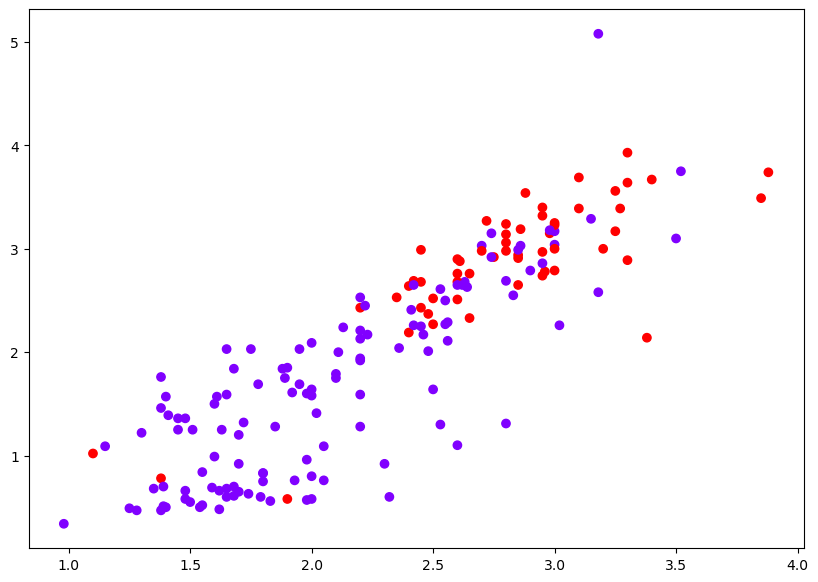

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(B.iloc[:,6], B.iloc[:,7], c=cluster.labels_, cmap='rainbow')
plt.show()

In [ ]:
df
### for k =2 silhouette_score   is 0.65 which is near to +1 indicates  indicates  excellent   cluster formation.  & Where we have lowest deviation with in the cluster and highest deviation in between the clusters

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


In [ ]:
print(PC1.shape) # PCA-transformed dataset.   here type is dropeed 1st
print(PC2.shape)
print(PC3.shape)

(178, 13)
(178, 14)
(178, 7)


In [ ]:
k_scores = []   #without type

# Ensure all column names are strings
PC1.columns = PC1.columns.astype(str) #This will change only the column names into strings, not the data itself.

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i, n_init=20)
    PC1["kmeans"] = cluster.fit_predict(PC1)
    from sklearn.metrics import silhouette_score
    k_scores.append(silhouette_score(PC1, PC1["kmeans"]))

print(PC1["kmeans"].value_counts())
k_scores
#### for k =2 silhouette_score   is 0.1(100%) which is near to +1 indicates  indicates  excellent   cluster formation.  & Where we have lowest deviation with in the cluster and highest deviation in between the clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

kmeans
4    28
2    26
7    25
1    18
3    18
9    17
8    16
6    14
5     9
0     7
Name: count, dtype: int64


[0.2803343314111214,
 0.29993062362472306,
 0.2919463501578649,
 0.30472014675159187,
 0.28817601015226957,
 0.3292968116211301,
 0.31710834872865923,
 0.24705542722739832,
 0.27235088160883075]

In [ ]:
k_scores = []     #with type

# Ensure all column names are strings
PC2.columns = PC2.columns.astype(str) #This will change only the column names into strings, not the data itself.

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster2= KMeans(n_clusters=i, n_init=20)
    PC2["kmeans"] = cluster2.fit_predict(PC2)
    from sklearn.metrics import silhouette_score
    k_scores.append(silhouette_score(PC2, PC2["kmeans"]))

print(PC2["kmeans"].value_counts())
k_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

kmeans
6    31
4    25
5    22
2    22
8    19
1    18
7    16
0    10
9     8
3     7
Name: count, dtype: int64


[0.29076199897987115,
 0.32650121033212,
 0.3356155489705708,
 0.3544700740934517,
 0.32810683196390367,
 0.3159104256387481,
 0.3225596623558211,
 0.3271122315920746,
 0.29771458624775754]

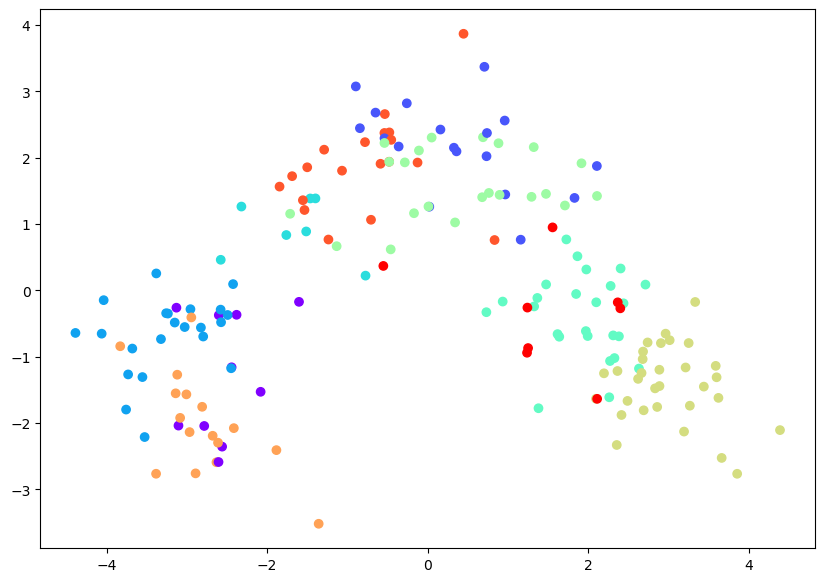

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(PC2.iloc[:,0], PC2.iloc[:,1], c=cluster2.labels_, cmap='rainbow')
plt.show()
# (8 diff colours indicats 8 cluster formation ) cluster with principal_components1 amd 2.

In [ ]:
k_scores = []

# Ensure all column names are strings
PC3.columns = PC3.columns.astype(str) #This will change only the column names into strings, not the data itself.

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i, n_init=20)
    PC3["kmeans"] = cluster.fit_predict(PC3)
    from sklearn.metrics import silhouette_score
    k_scores.append(silhouette_score(PC3, PC3["kmeans"]))

print(PC3["kmeans"].value_counts())
k_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Basma\AppData\Local\Temp\ipykernel_12676\2159173848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC3["kmeans"] = cluster.fit_predict(PC3)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Basma\AppData\Loc

kmeans
1    31
0    26
6    22
3    20
5    17
2    16
4    15
9    15
8    13
7     3
Name: count, dtype: int64


C:\Users\Basma\AppData\Local\Temp\ipykernel_12676\2159173848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC3["kmeans"] = cluster.fit_predict(PC3)


[0.31546407279547006,
 0.3439598181732131,
 0.3481536850323726,
 0.3840636293598955,
 0.3420430486544068,
 0.37074479357069984,
 0.3020015758858744,
 0.38017122958256777,
 0.31023862222105925]

# Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset


- 1.  (original[stadardized,discrete]) ALL_COL= WITH K =5 The silhouette_score  0.36017031917914705,
- 2.  (original)df= WITH K =2 The silhouette_score 0.6568547938114834  
  3.  (original(stadardized)) = WITH K =10 The silhouette_score0.3711197347991908


-  3. PC1(stadardized)stan_df= WITH K =8 The silhouette_score 0.3490932771176451   #without discrete type   var
- 4. PC2(stadardized,discrete]) ALL_COL= WITH K =3 The silhouette_score 0.33268398383614634    #with discrete type var

- 5. PC3(allcol[0:7])= WITH K =8 The silhouette_score 0.41716348940510944,

  ***PCA IS PRIMARLY USED FOR CONTINOUS VAR***
________________________________________________________________________________________________________________________________________________________


1. clustering results obtained WITH PC2(stadardized,discrete]) ALL_COL= WITH K =3 The silhouette_score 0.33268398383614634  for  PCA-transformed data   &
(original[stadardized,discrete])ALL_COL= WITH K =5 The silhouette_score 0.3436526935418118  **there is not much diff in results.
but (original)df= WITH K =2 The silhouette_score 0.6568502378884776  is highest score.**
2. There is not much diff in scores if we apply kmeans on ORIGINAL Dataset or Pricipal componets.
3. the impact of dimensionality reduction on clustering performance  is better ,i have droped variables with least variance  and the score is
    incresed from PC1 TO PC3  {PC3(allcol[0:7])= WITH K =8 The silhouette_score 0.41716348940510944}
4. using clustering directly on the original dataset  has given a best results.

# Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


**for overfitting we can use PCA  to reduce the dimensions of dataset.WE can drop components  with low variance. With remaining components which has
high variance we can select and apply CLUTERING mEthods to find TARGET VARIABLE(if & only  if TARGET VARIABLEdoes not exist in dataset ).Then we
can APPLY ANY SUPERVISED CLASSIFICATION algothims for PREDICTION**.

* when a dataset contains a lot of varibales which can cause multicolinearity issue,overfitting issue then to ovrcom those go for  PCA technique should be used to reduce the dimensions of dataset ,and clustering should be used to find TARGET VARIABLE.


I the clustering on the PCA-transformed data is returning lower silhouette scores compared to the original data. This can happen for several reasons:

1. **Information Loss:** PCA reduces the dimensionality of the data, which can sometimes lead to the loss of important information that was helping to define the clusters.

2. **Noise Reduction:** While PCA reduces noise, it might also inadvertently remove useful variance that was contributing to well-defined clusters.

3. **Interpretation of Principal Components:** The principal components are linear combinations of the original features, which might not capture non-linear relationships in the data as effectively.

**Next Steps:**
- **Check Explained Variance:** Ensure that the retained principal components are explaining a substantial portion of the total variance in the dataset.
- **Experiment with Different Number of Components:** Sometimes, keeping a slightly higher number of principal components might capture more useful information and improve clustering results.
- **Alternative Clustering Methods:** Consider experimenting with other clustering methods, like hierarchical clustering or DBSCAN, which might work better with the reduced-dimensionality data.

It's all about finding the right balance and the method that best suits your specific dataset.


***NOTE:- ONLY PC1  & df1 DATASET IS IMPORTANT***

-    **key findings and insights from the assignment.**
-
  **Q:- i applied kmeans on original dataset and standarized dataset but the silhouette_score for original datset is 65 for standarized datset 37 why so ?**
- The silhouette score measures how similar a data point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

### Possible Reasons for Your Result:

1. **Feature Importance**:
   - In the original dataset, certain features might have naturally more significant values, which can lead the algorithm to form well-defined clusters based on those dominant features.
   - When you standardize the data, all features are brought to the same scale, which might reduce the influence of those naturally significant features, leading to less distinct clusters.

2. **Data Distribution**:
   - The original data distribution might be such that the natural clusters are more evident without scaling.
   - Standardizing the data can sometimes disrupt this natural distribution, making the clusters less distinct.

3. **Outliers**:
   - In the original data, outliers might play a role in defining the clusters. When you standardize, the influence of outliers is reduced, which can affect the clustering results.

4. **Algorithm Sensitivity**:
   - Some clustering algorithms, like K-means, are sensitive to the scale of the data. If the original data had well-separated clusters due to the scale of certain features, standardizing could reduce this separation.

### Summary
While standardizing data is generally recommended for clustering, there can be cases where the original data's natural scale leads to better-defined clusters. It's always a good idea to experiment with both and choose the approach that gives the best results for your specific dataset.

